<a href="https://colab.research.google.com/github/Raiden-Makoto/510Spadina/blob/main/styletransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from diffusers import AutoencoderKL, StableDiffusionPipeline

/Users/maxcui/Downloads/510Spadina/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch
from PIL import Image

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps")
model_id = "xyn-ai/anything-v4.0"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32,
    safety_checker=None
).to(device)
#pipe.enable_xformers_memory_efficient_attention()
vae = AutoencoderKL.from_pretrained(
    "stabilityai/sd-vae-ft-mse",
    torch_dtype=torch.float32
).to("mps")
pipe.vae = vae
pipe.enable_attention_slicing("max")  # uses the smallest possible slices (lowest VRAM, slowest)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]`torch_dtype` is deprecated! Use `dtype` instead!
/Users/maxcui/Downloads/510Spadina/.venv/lib/python3.13/site-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 20.79it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzi

In [5]:
prompt = "fischl_(genshin impact), blush, portrait"
negative_prompt = "realistic, photorealistic, low quality, blur"

In [8]:
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=7.5,
    num_inference_steps=30,
    num_images_per_prompt=1,
    height=512,   # smaller height
    width=512     # smaller width
).images[0]

100%|██████████| 30/30 [00:25<00:00,  1.19it/s]


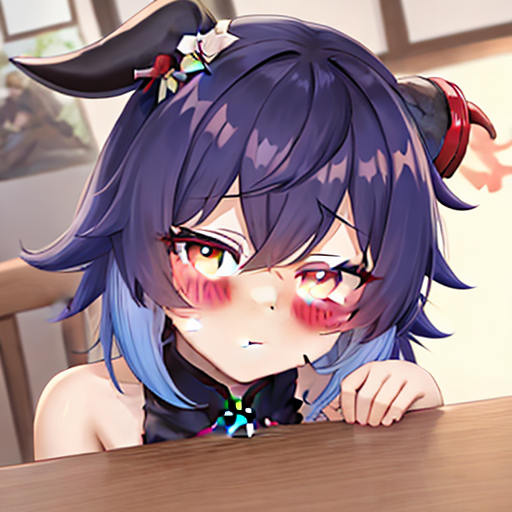

In [9]:
result